## Домашняя работа: Временные ряды, общая теория  

Требуется проанализировать временные ряды (два дата сета) и сделайте их стационарными.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Реализация

напишем несколько функций и разделим выполнение работы на две части:
- Часть I "динамика продаж автомобилей в США"
- Часть II "Показатели закрытия индекса DowJones"

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Часть I

In [5]:
series = pd.read_csv("monthly-us-auto-registration-tho.csv", delimiter=';')['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


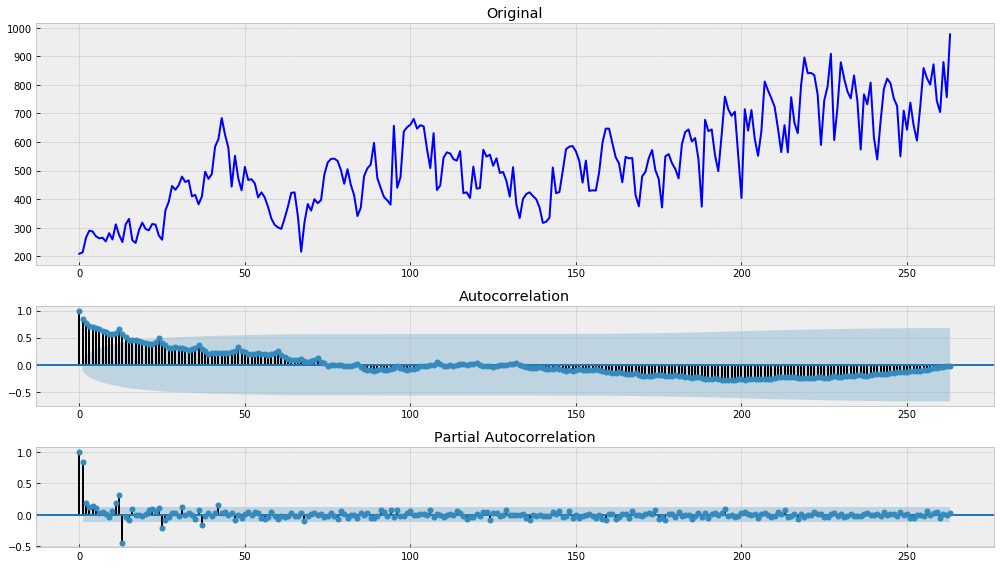

In [6]:
tsplot(series)

В результате выполнения теста Дики-Фуллера мы получили значение `p-value .66` . При таком уровене значимости у нас недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу (о нестационарности ряда). Мы видим на графике тренд, сезонность и наверное нечто похожее на цикличность, наши наблюдения подтверждают и коррелограммы. Чтобы изменить данную ситуацию  выполним ряд преобразований, сначала поработаем с дисперсией, при помощи преобразования Бокса-Кокса снизим уровень дисперсии. 

In [7]:
#рандомно выберу значение коэффициента равное .9

series = boxcox(series, .9)

Results of Dickey-Fuller Test:
Test Statistic                  -1.290354
p-value                          0.633574
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


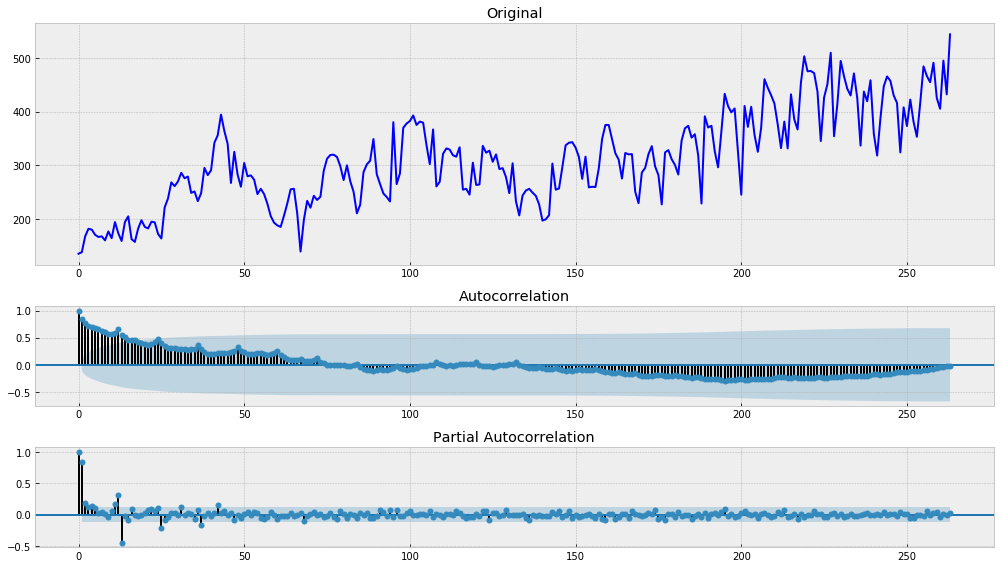

In [8]:
tsplot(series)

В результате выполнения преобразования Бокса-Кокса нам удалось существенно понизить уровень дисперсии, тест Дики-Фуллера дает значение `p-value .63` при таком уровене значимости у нас все еще недостаточно оснований для того чтобы отвергнуть нулеву гипотезу. На графике все еще можно наблюдать тренд, сезонность и цикличность, выполним еще одно преобразований, уберем тренд дифференцированием. 





In [9]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -4.201397
p-value                          0.000655
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


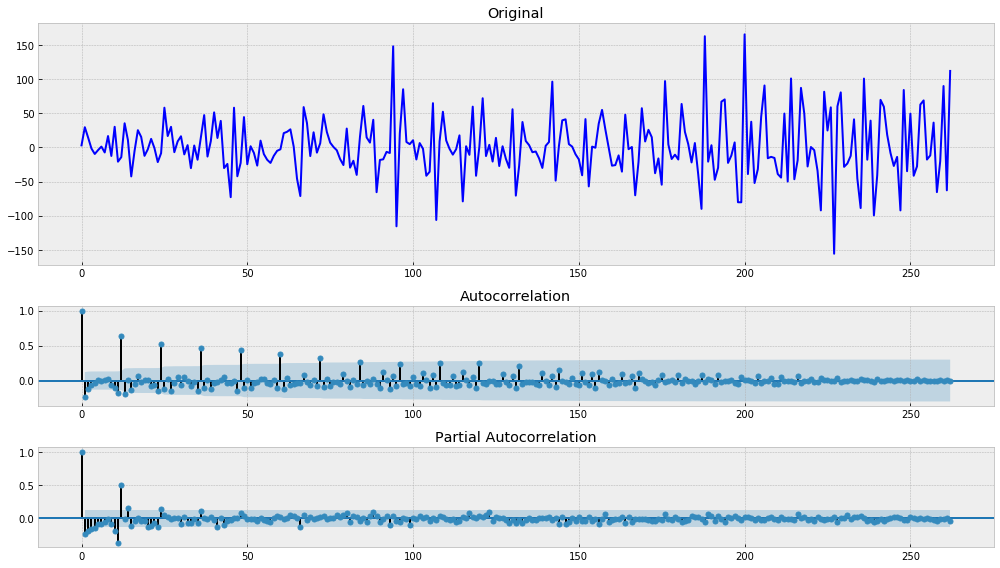

In [10]:
tsplot(series)

После дифференцирования, тест Дики-Фуллера дает значение `p-value .0006` при таком уровене значимости у нас достаточно оснований для того чтобы отвергнуть нулевую гипотезу. На графике коррелограммы видно влияние сезонности, выполним еще одно преобразование чтобы убрать сезонность (если это вообще возможно).

In [11]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.557508e+00
p-value                        8.543153e-09
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


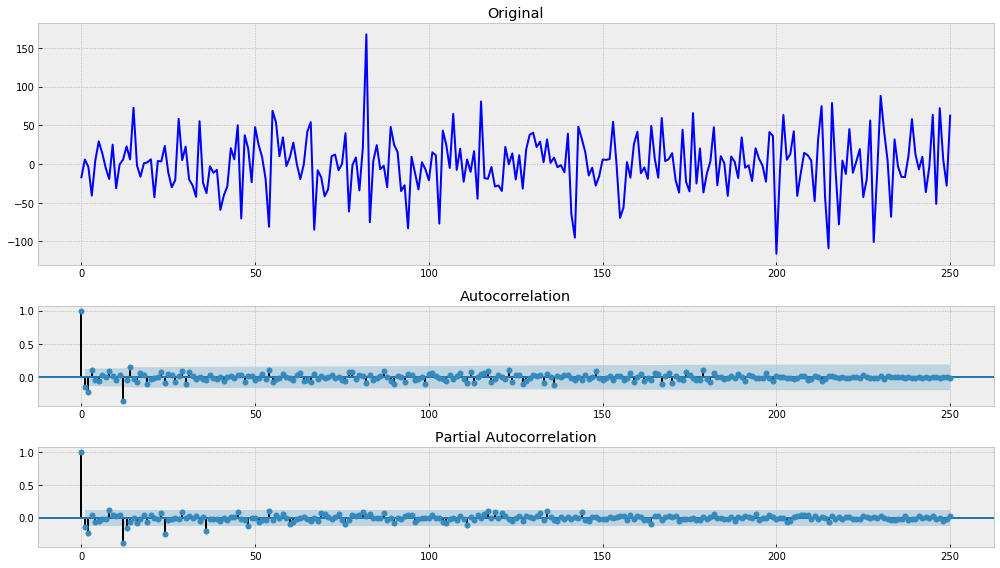

In [12]:
tsplot(series)

Теперь тест Дики-Фуллера `p-value 8.543153e-09` и графики коррелограмм отвергают гипотезу о нестационарности ряда.

## Часть II

In [24]:
series_1 = pd.read_csv("weekly-closings-of-the-dowjones-.csv", delimiter=',')['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


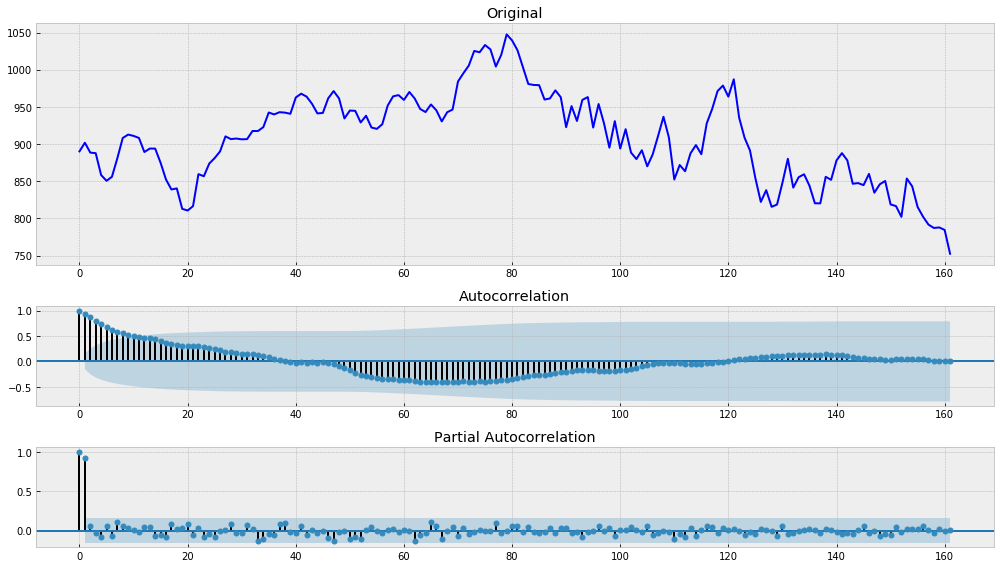

In [33]:
tsplot(series_1)

В результате выполнения теста Дики-Фуллера мы получили значение `p-value .62` при таком уровене значимости у нас недостаточно оснований для того чтобы отвергнуть нулевую гипотезу (о нестационарности ряда). Мы видим на графике ярковыраженный тренд, наши наблюдения подтверждают и коррелограммы. Кроме того мы видим что системы в определенный момент проходит некоторыую точку бифуркации и меняет свое состояние, это интересное наблюдение. Разделим наш набор данных на три обьекта исследования:
    - период когда системы устойчиво росла
    - период устойчивого снижения
    - полный набор данных с учетом роста и снижения

### Исследование I  (период когда система устойчиво росла)

In [35]:
series_g = series_1[:80]

Results of Dickey-Fuller Test:
Test Statistic                 -0.566289
p-value                         0.878419
#Lags Used                      1.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


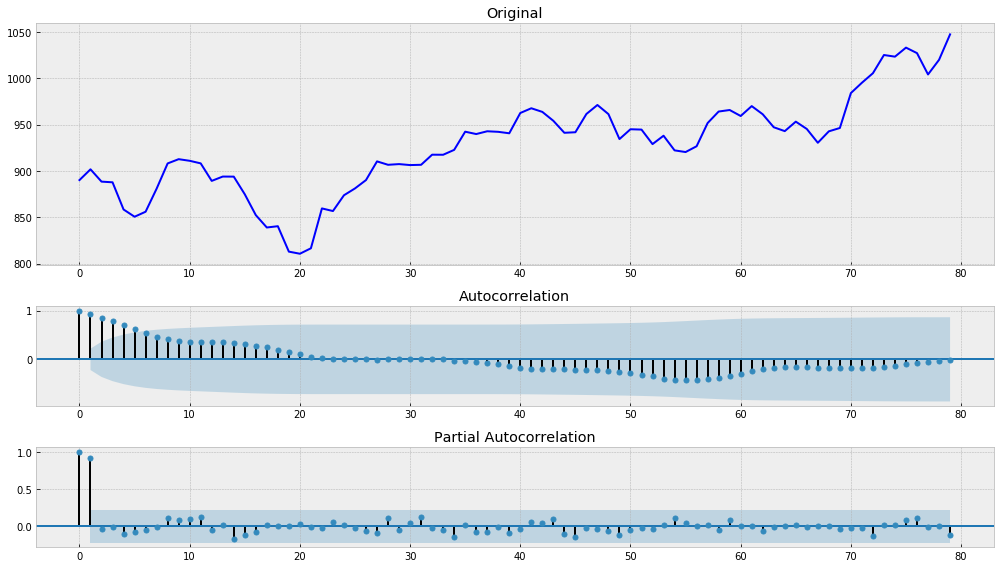

In [36]:
tsplot(series_g)

В результате выполнения теста Дики-Фуллера мы получили значение `p-value .87` при таком уровене значимости у нас недостаточно оснований для того чтобы отвергнуть нулевую гипотезу (о нестационарности ряда). Мы видим на графике сильный тренд, наши наблюдения подтверждают и коррелограммы. Чтобы изменить данную ситуацию  выполним ряд преобразований, сначала поработаем с дисперсией, при помощи преобразования Бокса-Кокса снизим уровень дисперсии. 

In [39]:
#рандомно выберру значение коэффициэнта равное .9

series_G = boxcox(series_g, .9)

Results of Dickey-Fuller Test:
Test Statistic                 -0.579787
p-value                         0.875484
#Lags Used                      1.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


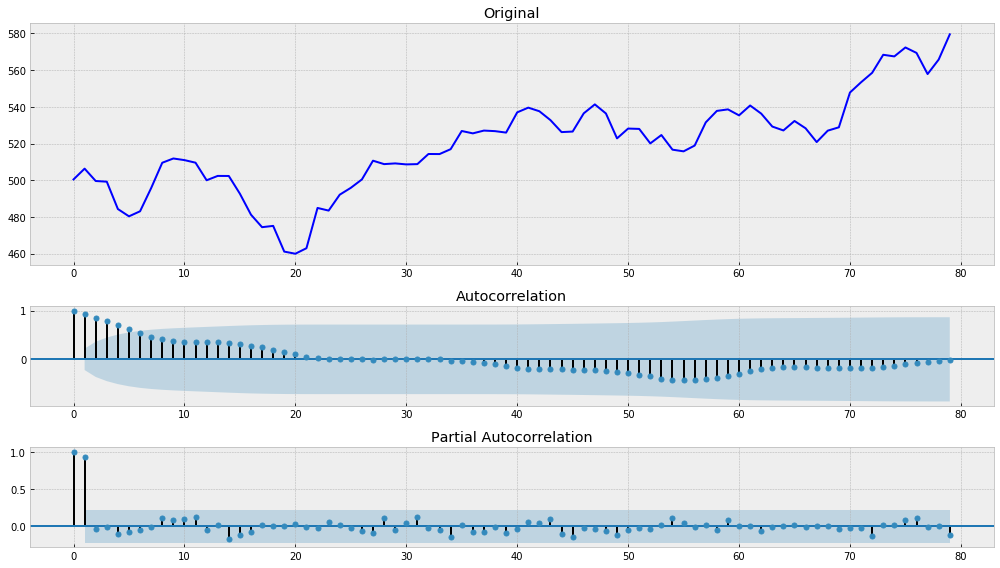

In [40]:
tsplot(series_G)

В результате выполнения преобразования Бокса-Кокса нам удалось понизить уровень дисперсии, тест Дики-Фуллера дает значение `p-value .87` , но картина не существенно поменялось относительно начальных данных, при таком уровене значимости у нас все еще недостаточно оснований для того чтобы отвергнуть нулеву гипотезу. На графике все еще можно наблюдать тренд, выполним еще одно преобразований, уберем тренд дифференцированием. 

In [41]:
series_diff = series_G[1:] - series_G[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -6.929323e+00
p-value                        1.094421e-09
#Lags Used                     0.000000e+00
Number of Observations Used    7.800000e+01
Critical Value (1%)           -3.517114e+00
Critical Value (5%)           -2.899375e+00
Critical Value (10%)          -2.586955e+00
dtype: float64


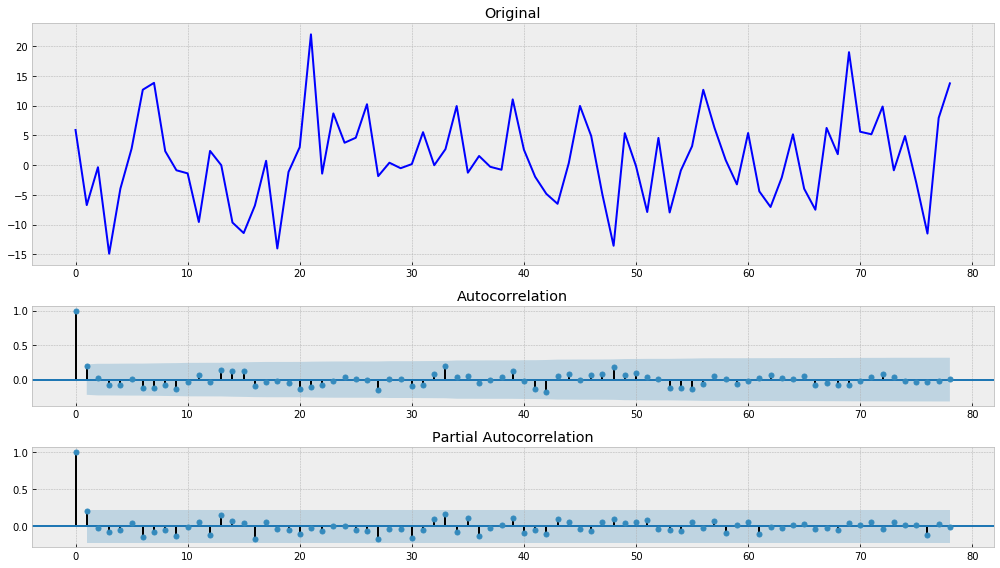

In [42]:
tsplot(series_diff)

Первая неожиданность!!!

После дифференцирования, тест Дики-Фуллера дает значение `p-value 1.094421e-09` при таком уровене значимости у нас достаточно оснований для того чтобы отвергнуть нулевую гипотезу. Сложно сказать почему после дифференцирования произошло такое драматическое изменение `p-value`.

### Исследование II  (период когда систем устойчиво снижалась)

In [53]:
series_d = series_1[80:]

Results of Dickey-Fuller Test:
Test Statistic                 -1.954633
p-value                         0.306812
#Lags Used                      0.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


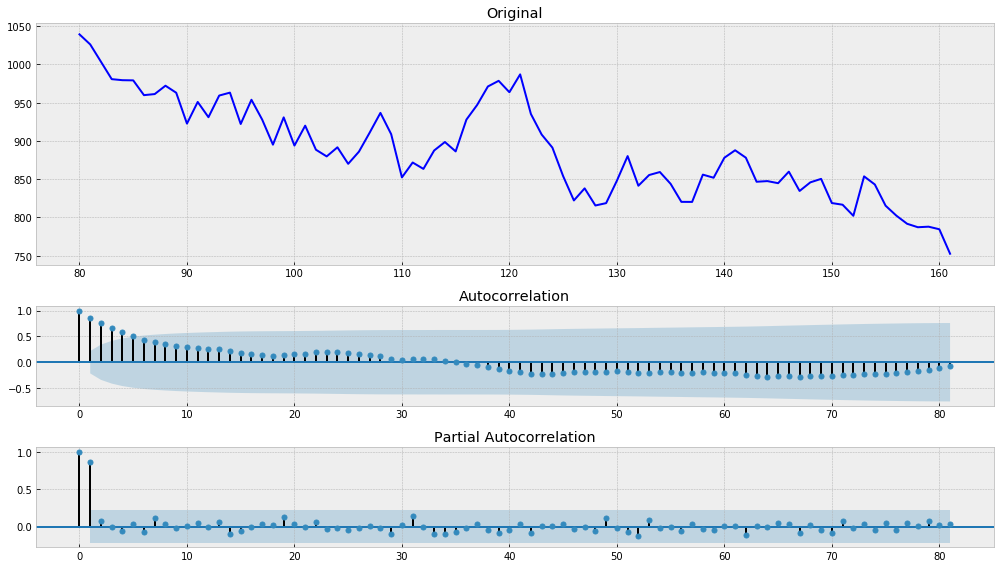

In [54]:
tsplot(series_d)

В результате выполнения теста Дики-Фуллера мы получили значение `p-value .30` при таком уровене значимости у нас недостаточно оснований для того чтобы отвергнуть нулевую гипотезу (о нестационарности ряда). Мы видим на графике сильный тренд, наши наблюдения подтверждают и коррелограммы. Чтобы изменить данную ситуацию  выполним ряд преобразований, сначала поработаем с дисперсией, при помощи преобразования Бокса-Кокса снизим уровень дисперсии. 

In [57]:
#рандомно выберру значение коэффициэнта равное .9

series_D = boxcox(series_d, .9)

Results of Dickey-Fuller Test:
Test Statistic                 -1.915284
p-value                         0.324905
#Lags Used                      0.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


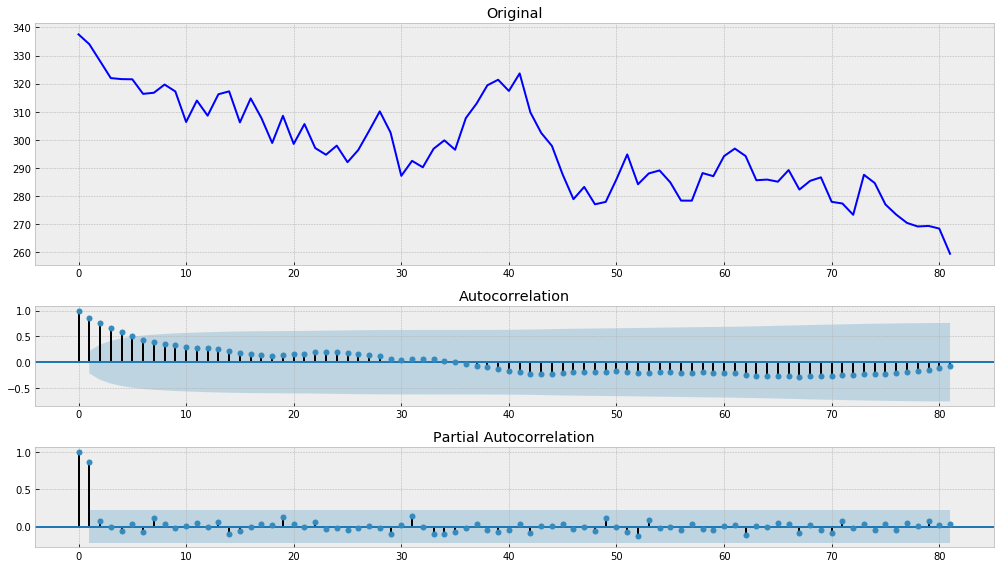

In [58]:
tsplot(series_D)

В результате выполнения преобразования Бокса-Кокса нам удалось понизить уровень дисперсии, тест Дики-Фуллера дает значение `p-value .32` подросло относительно начальных данных, при таком уровене значимости у нас все еще недостаточно оснований для того чтобы отвергнуть нулевую гипотезу. На графике все еще можно наблюдать тренд. выполним еще одно преобразований, уберем тренд дифференцированием. 

In [59]:
series_di = series_D[1:] - series_D[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.018052e+01
p-value                        6.713835e-18
#Lags Used                     0.000000e+00
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64


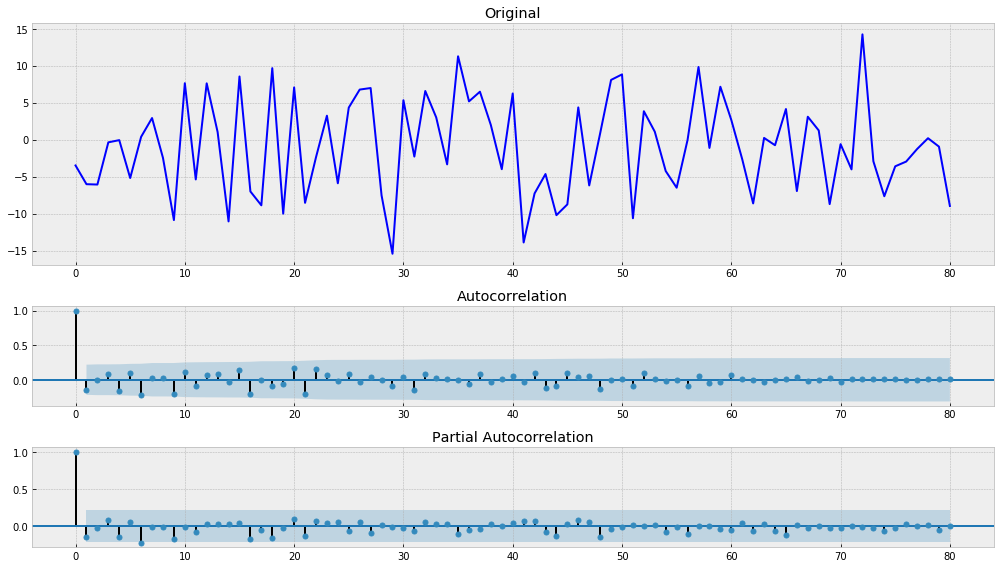

In [60]:
tsplot(series_di)

После дифференцирования, тест Дики-Фуллера дает значение `p-value 6.713835e-18` при таком уровене значимости у нас достаточно оснований для того чтобы отвергнуть нулевую гипотезу.

### Исследование III  (начальный набор данных)

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


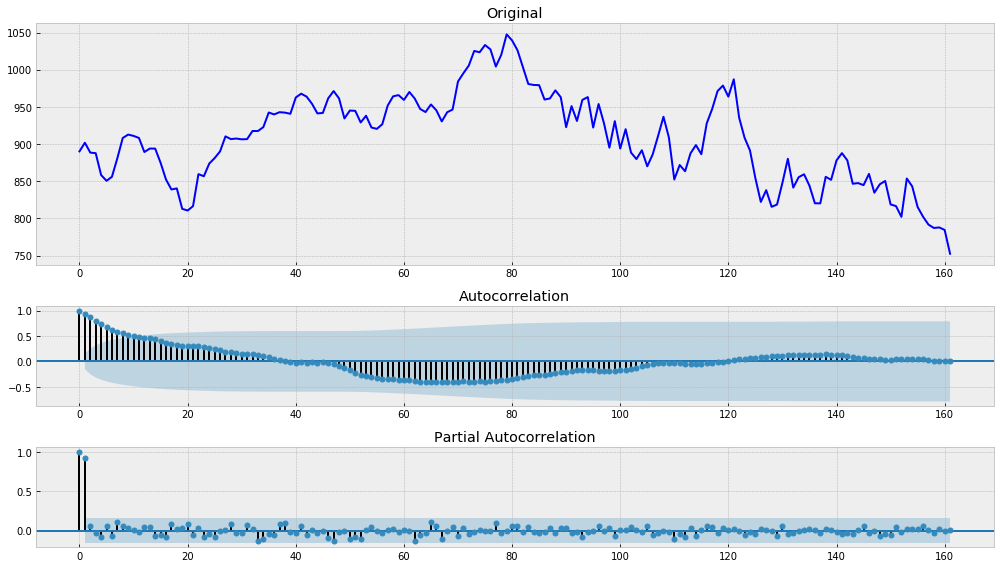

In [61]:
tsplot(series_1)

В результате выполнения теста Дики-Фуллера мы получили значение `p-value .62` при таком уровене значимости у нас недостаточно оснований для того чтобы отвергнуть нулевую гипотезу (о нестационарности ряда). Мы видим на графике цикличность тренда, наши наблюдения подтверждают и коррелограммы. Чтобы изменить данную ситуацию  выполним ряд преобразований, сначала поработаем с дисперсией, при помощи преобразования Бокса-Кокса снизим уровень дисперсии. 

In [62]:
#рандомно выберру значение коэффициэнта равное .9

series_1 = boxcox(series_1, .9)

Results of Dickey-Fuller Test:
Test Statistic                  -1.304623
p-value                          0.627055
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


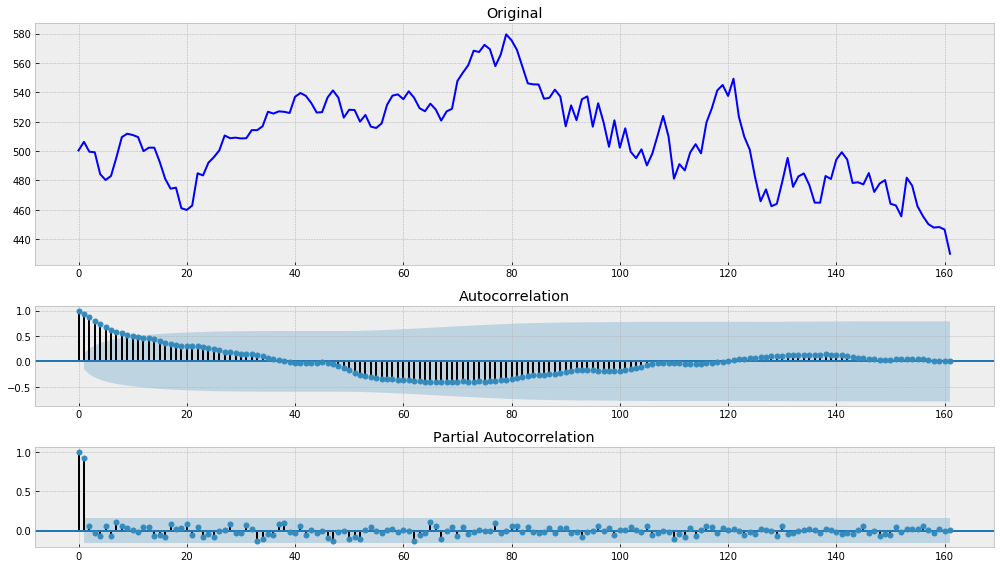

In [63]:
tsplot(series_1)

В результате выполнения преобразования Бокса-Кокса нам удалось понизить уровень дисперсии, тест Дики-Фуллера дает значение `p-value .62` при таком уровене значимости у нас все еще недостаточно оснований для того чтобы отвергнуть нулеву гипотезу. На графике все еще можно наблюдать трендвыполним еще одно преобразований, уберем тренд дифференцированием. 

In [64]:
series_di = series_1[1:] - series_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.302323e+01
p-value                        2.429252e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


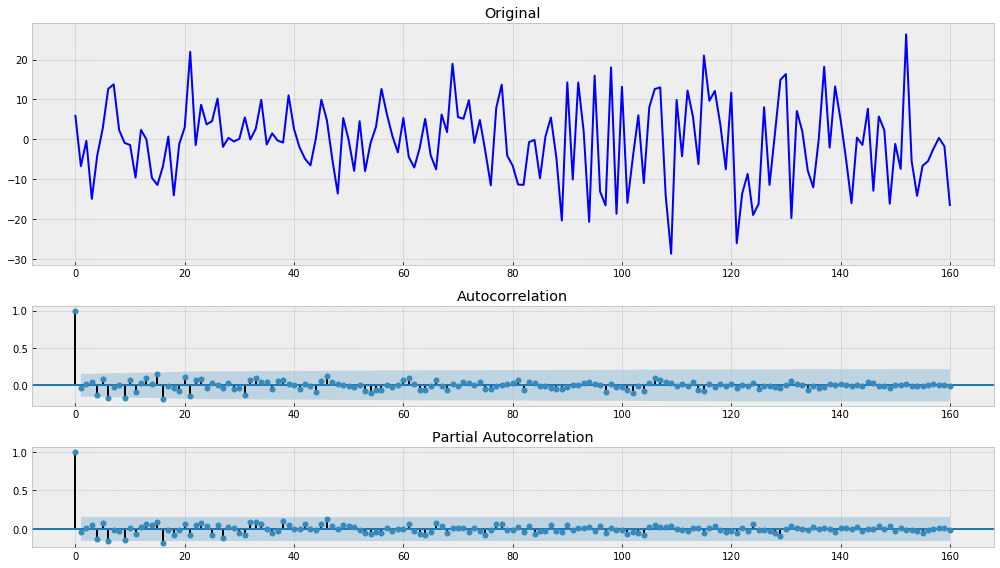

In [65]:
tsplot(series_di)

После дифференцирования, тест Дики-Фуллера дает значение `p-value 6.713835e-18` при таком уровене значимости у нас достаточно оснований для того чтобы отвергнуть нулеву гипотезу.